<a href="https://colab.research.google.com/github/mandeebot/eda-repo/blob/main/My_Monei.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

IMPORTING DATASET

In [16]:
data = pd.read_csv('myMonei.csv')
data.head()

,Unnamed: 0,Unnamed: 0.1,ListingNumber,ListingCreationDate,ListingCategory (numeric),Occupation,EmploymentStatus,IsBorrowerHomeowner,CurrentCreditLines,OpenRevolvingAccounts,...,CreditScoreRangeUpper,BorrowerState,LoanOriginationDate,IncomeRange,BorrowerAPR,BorrowerRate,StatedMonthlyIncome,Term,MymoneiRating,MymoneiScore
0,0,0,193129,2007-08-26 19:09:29.263000000,0,Other,Self-employed,True,5.0,1,...,659.0,CO,2007-09-12 00:00:00,"$25,000-49,999",0.16516,0.1580,3083.333333,36,NaN,NaN
1,1,1,1209647,2014-02-27 08:28:07.900000000,2,Professional,Employed,False,14.0,13,...,699.0,CO,2014-03-03 00:00:00,"$50,000-74,999",0.12016,0.0920,6125.000000,36,A,7.0
2,2,2,81716,2007-01-05 15:00:47.090000000,0,Other,Not available,False,NaN,0,...,499.0,GA,2007-01-17 00:00:00,Not displayed,0.28269,0.2750,2083.333333,36,NaN,NaN
3,3,3,658116,2012-10-22 11:02:35.010000000,16,Skilled Labor,Employed,True,5.0,7,...,819.0,GA,2012-11-01 00:00:00,"$25,000-49,999",0.12528,0.0974,2875.000000,36,A,9.0
4,4,4,909464,2013-09-14 18:38:39.097000000,2,Executive,Employed,True,19.0,6,...,699.0,MN,2013-09-20 00:00:00,"$100,000+",0.24614,0.2085,9583.333333,36,D,4.0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 113937 non-null  int64  
 1   Unnamed: 0.1               113937 non-null  int64  
 2   ListingNumber              113937 non-null  int64  
 3   ListingCreationDate        113937 non-null  object 
 4   ListingCategory (numeric)  113937 non-null  int64  
 5   Occupation                 110349 non-null  object 
 6   EmploymentStatus           111682 non-null  object 
 7   IsBorrowerHomeowner        113937 non-null  bool   
 8   CurrentCreditLines         106333 non-null  float64
 9   OpenRevolvingAccounts      113937 non-null  int64  
 10  DebtToIncomeRatio          105383 non-null  float64
 11  IncomeVerifiable           113937 non-null  bool   
 12  LoanOriginalAmount         113937 non-null  int64  
 13  LoanStatus                 11

In [18]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,113937.0,56968.000000,32890.923148,0.00000,28484.000000,56968.000000,85452.00000,1.139360e+05
Unnamed: 0.1,113937.0,56968.000000,32890.923148,0.00000,28484.000000,56968.000000,85452.00000,1.139360e+05
ListingNumber,113937.0,627885.692506,328076.236386,4.00000,400919.000000,600554.000000,892634.00000,1.255725e+06
ListingCategory (numeric),113937.0,2.774209,3.996797,0.00000,1.000000,1.000000,3.00000,2.000000e+01
CurrentCreditLines,106333.0,10.317192,5.457866,0.00000,7.000000,10.000000,13.00000,5.900000e+01
OpenRevolvingAccounts,113937.0,6.969790,4.630970,0.00000,4.000000,6.000000,9.00000,5.100000e+01
DebtToIncomeRatio,105383.0,0.275947,0.551759,0.00000,0.140000,0.220000,0.32000,1.001000e+01
LoanOriginalAmount,113937.0,8337.013850,6245.800580,1000.00000,4000.000000,6500.000000,12000.00000,3.500000e+04
CreditScoreRangeLower,113346.0,685.567731,66.458275,0.00000,660.000000,680.000000,720.00000,8.800000e+02
CreditScoreRangeUpper,113346.0,704.567731,66.458275,19.00000,679.000000,699.000000,739.00000,8.990000e+02


In [19]:
data.duplicated().sum()

0

In [20]:
data.isna().sum()

Unnamed: 0                       0
Unnamed: 0.1                     0
ListingNumber                    0
ListingCreationDate              0
ListingCategory (numeric)        0
Occupation                    3588
EmploymentStatus              2255
IsBorrowerHomeowner              0
CurrentCreditLines            7604
OpenRevolvingAccounts            0
DebtToIncomeRatio             8554
IncomeVerifiable                 0
LoanOriginalAmount               0
LoanStatus                       0
CreditScoreRangeLower          591
CreditScoreRangeUpper          591
BorrowerState                 5515
LoanOriginationDate              0
IncomeRange                      0
BorrowerAPR                     25
BorrowerRate                     0
StatedMonthlyIncome              0
Term                             0
MymoneiRating                29084
MymoneiScore                 29084
dtype: int64

DATA PREPROCESSING

after assessing the dataset, we have identified some cleaniless andmessy data issues, which oughht to be fixed.

In [21]:
#fixing datatypes
data['ListingCreationDate'][0]

'2007-08-26 19:09:29.263000000'

In [22]:
data['ListingCreationDate'] = pd.to_datetime(data['ListingCreationDate'])
data['LoanOriginationDate'] = pd.to_datetime(data['LoanOriginationDate'])

In [23]:
data['LoanOriginationDate'][0]

Timestamp('2007-09-12 00:00:00')

In [24]:
#we create some new features
#extracting date information from listing creation date column

data['day'] = data['ListingCreationDate'].dt.date
data['month'] = data['ListingCreationDate'].dt.month
data['year'] = data['ListingCreationDate'].dt.year

data.drop(columns=['ListingCreationDate','Unnamed: 0.1','Unnamed: 0'],axis=1,inplace=True)

In [26]:
#data.info()

EDA
what are the main features of interest in your data set? what are the main factors affecting your interest rate? what is the average interest rate on big loans?are there are differenes between loans depending on the different levels of employment

In [29]:
#setting visualization styles
sns.set_style('whitegrid')

#ignore warnings
warnings.filterwarnings('ignore')

UNIVARIATE ANALYSIS

In [31]:
data.columns

Index(['ListingNumber', 'ListingCategory (numeric)', 'Occupation',
       'EmploymentStatus', 'IsBorrowerHomeowner', 'CurrentCreditLines',
       'OpenRevolvingAccounts', 'DebtToIncomeRatio', 'IncomeVerifiable',
       'LoanOriginalAmount', 'LoanStatus', 'CreditScoreRangeLower',
       'CreditScoreRangeUpper', 'BorrowerState', 'LoanOriginationDate',
       'IncomeRange', 'BorrowerAPR', 'BorrowerRate', 'StatedMonthlyIncome',
       'Term', 'MymoneiRating', 'MymoneiScore', 'day', 'month', 'year'],
      dtype='object')

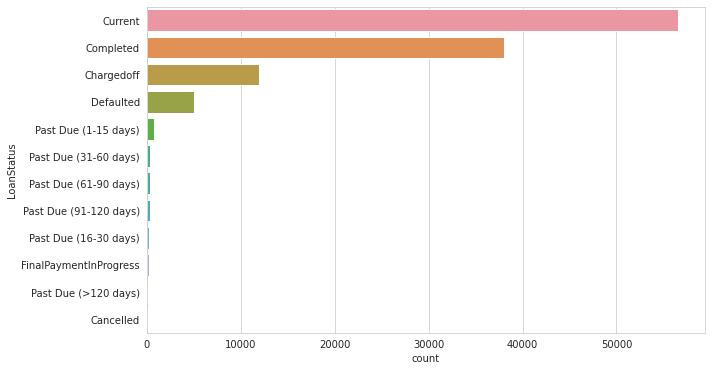

In [36]:
#plot loan status
plt.figure(figsize=(10,6))
order = data.LoanStatus.value_counts().index
sns.countplot(y='LoanStatus',order= order, data=data);

we can see that the My Monei loan app burrowers have a good profile, with atleast 80% of the burrowers curent/complete in thier loan status

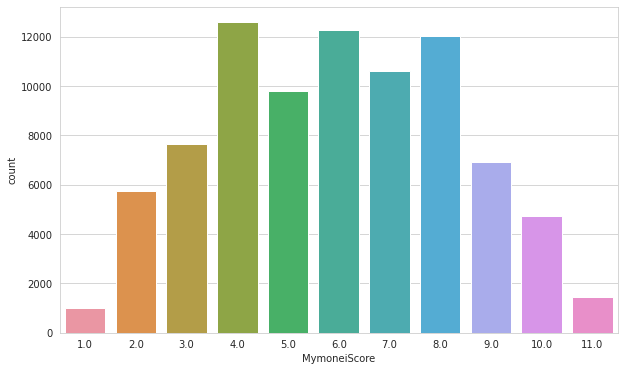

In [38]:
#new lets explore the loan score
plt.figure(figsize=(10,6))
sns.countplot(x='MymoneiScore',data=data);

the score is built using historical data to assess the risk of burrowers. it ranges from 1 to 11, with 11 being the lowest risk, and 1 being the hisghest risk score
the distribution above, indicates a bell-shaped distribution spiking on scores 4,6,8 and we have fewer counts in both tails

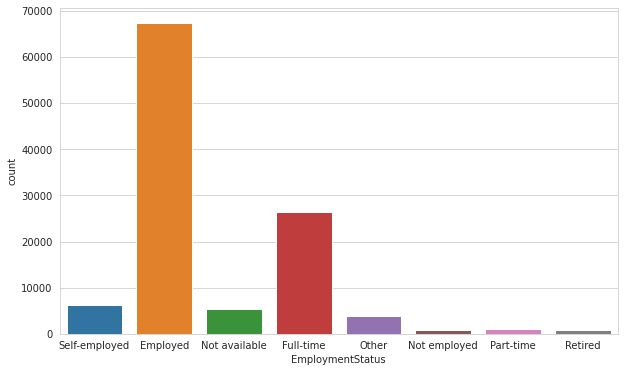

In [39]:
#explore employment status
plt.figure(figsize=(10,6))
sns.countplot(x='EmploymentStatus',data=data);

we can deduce from the visualization above that a large numbe rof the burrowers(clients) are actually employed

BIVARIATE ANALYSIS

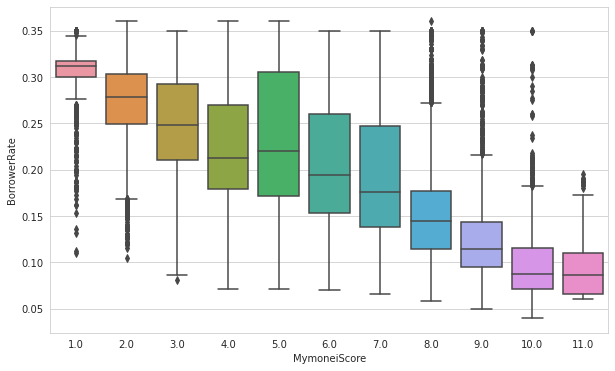

In [40]:
#exploring the interest rate(burrowerrate) vs risk score(mymonei)
plt.figure(figsize=(10,6))
sns.boxplot(x='MymoneiScore',y='BorrowerRate',data=data);

from the visualization above, we can see that the least the risk score of a burrower is, the lesser the interest rate aacrued to that burrower, and reverse is the case for high risk burrowers,

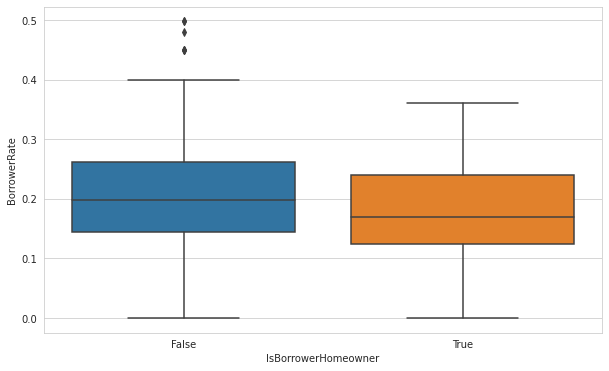

In [43]:
#exploring interst rate vs wehter burrower is a home owner
plt.figure(figsize=(10,6))
sns.boxplot(x='IsBorrowerHomeowner',y='BorrowerRate',data=data);

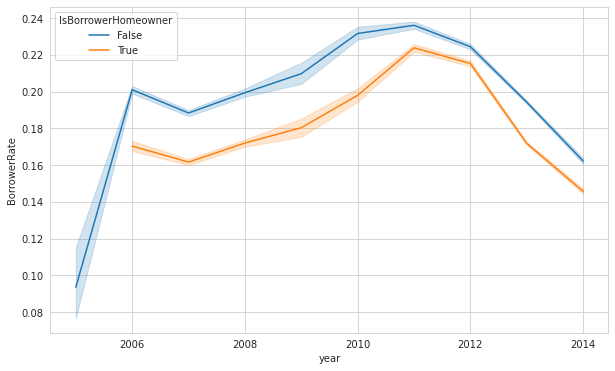

In [46]:
plt.figure(figsize=(10,6))
sns.lineplot(x='year',y='BorrowerRate',hue='IsBorrowerHomeowner',data=data);

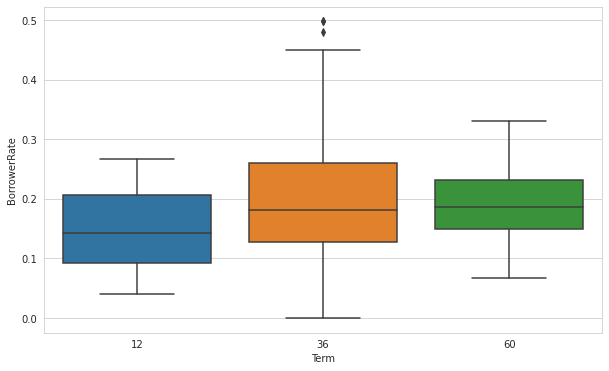

In [48]:
#exploring interst rate vs loan term
plt.figure(figsize=(10,6))
sns.boxplot(x='Term',y='BorrowerRate',data=data);

MULTIVARIATE ANALYSIS

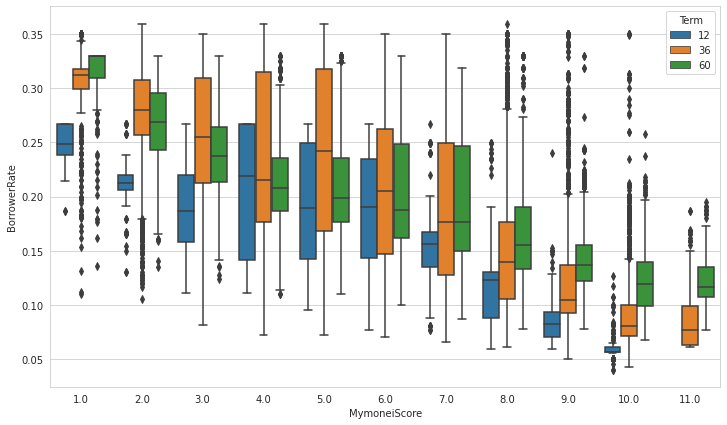

In [50]:
#exploring interst rate vs loan term
plt.figure(figsize=(12,7))
sns.boxplot(x='MymoneiScore',y='BorrowerRate',hue='Term',data=data);

In [51]:
numeric_vars = ['CurrentCreditLines', 'OpenRevolvingAccounts',
               'DebtToIncomeRatio', 'LoanOriginalAmount', 'StatedMonthlyIncome', 'BorrowerAPR','BorrowerRate']

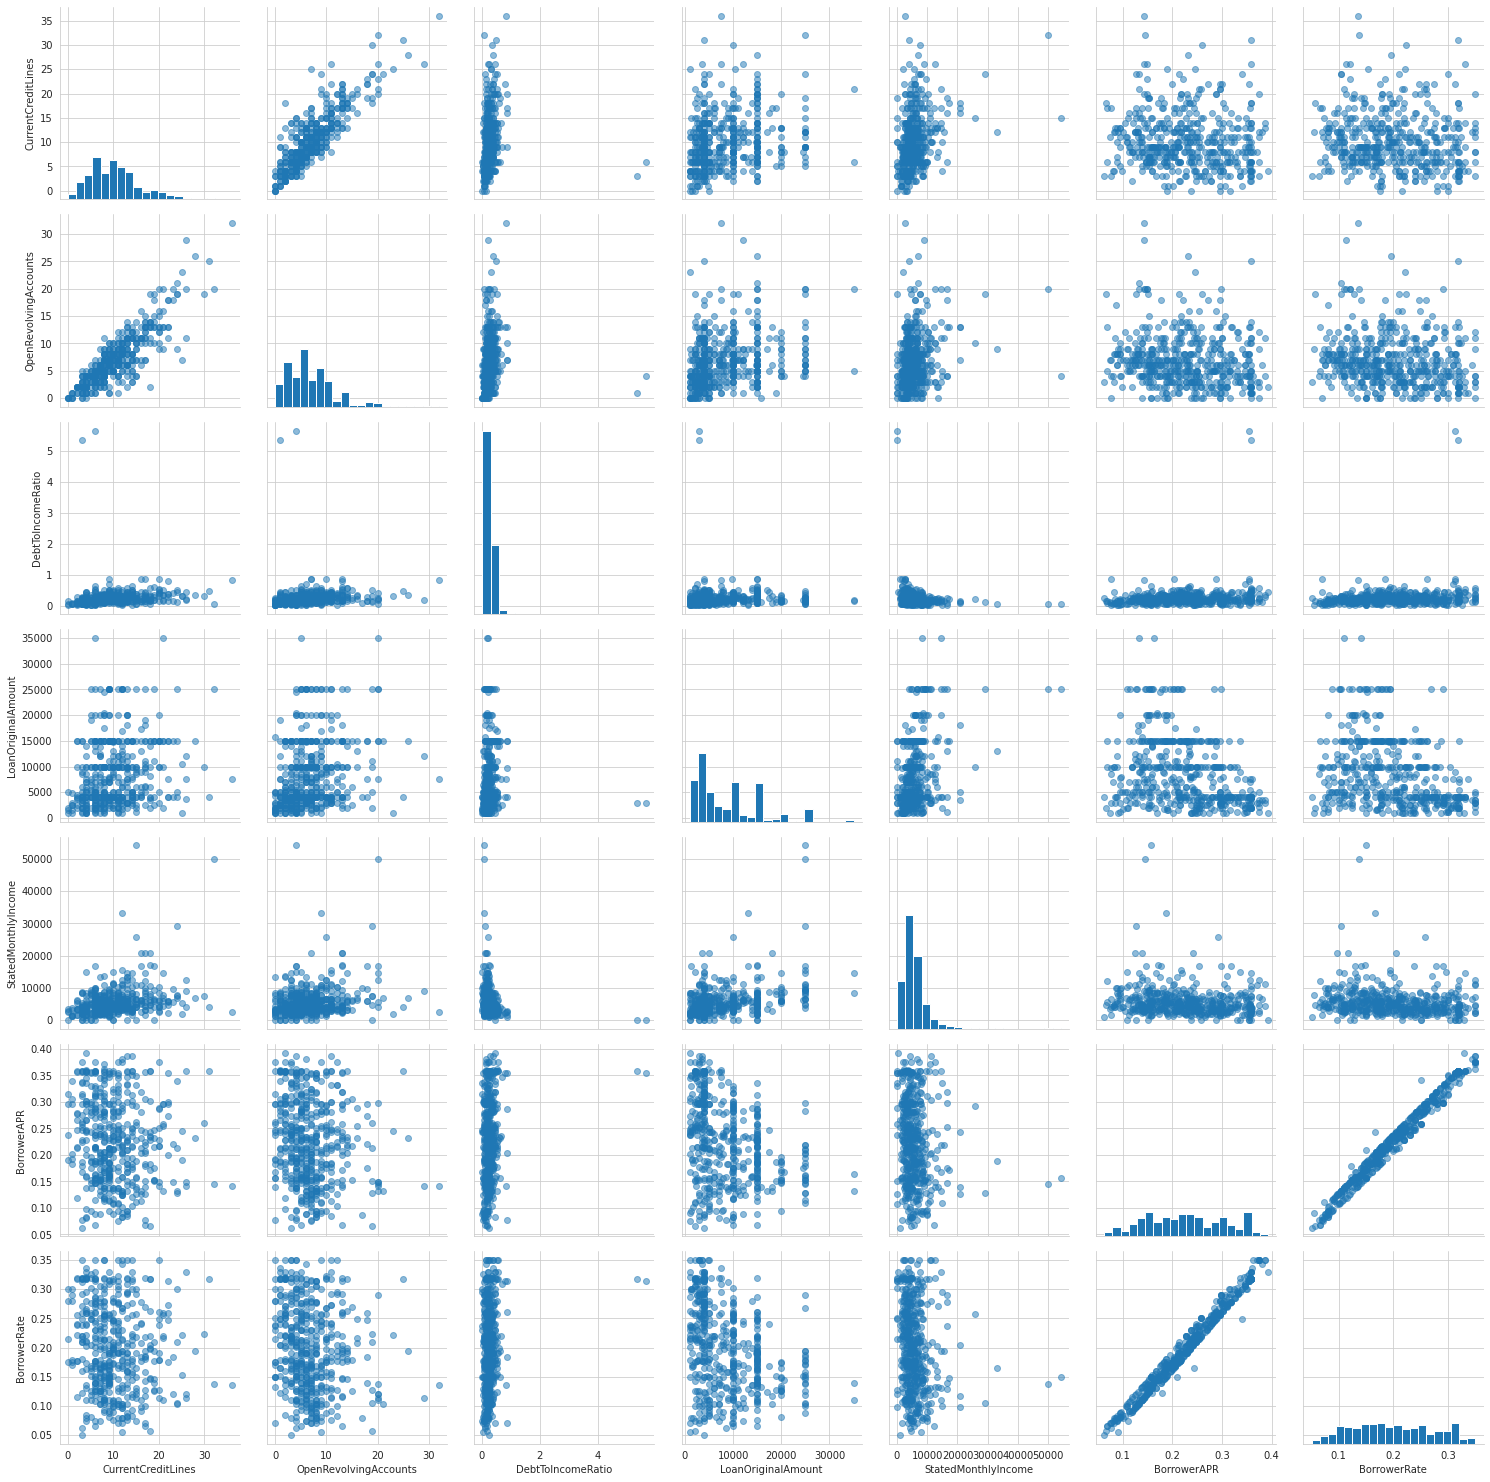

In [52]:
#plot matrix plot, smaple 500 loans, so that our plots will be clear, adn to save computing time
samples = np.random.choice(data.shape[0],500,replace=False)
samples = data.reindex(samples)

#pairgrid
g = sns.PairGrid(data=samples,vars=numeric_vars, size=3)
g = g.map_diag(plt.hist,bins=20)
g.map_offdiag(plt.scatter,alpha=1/2);

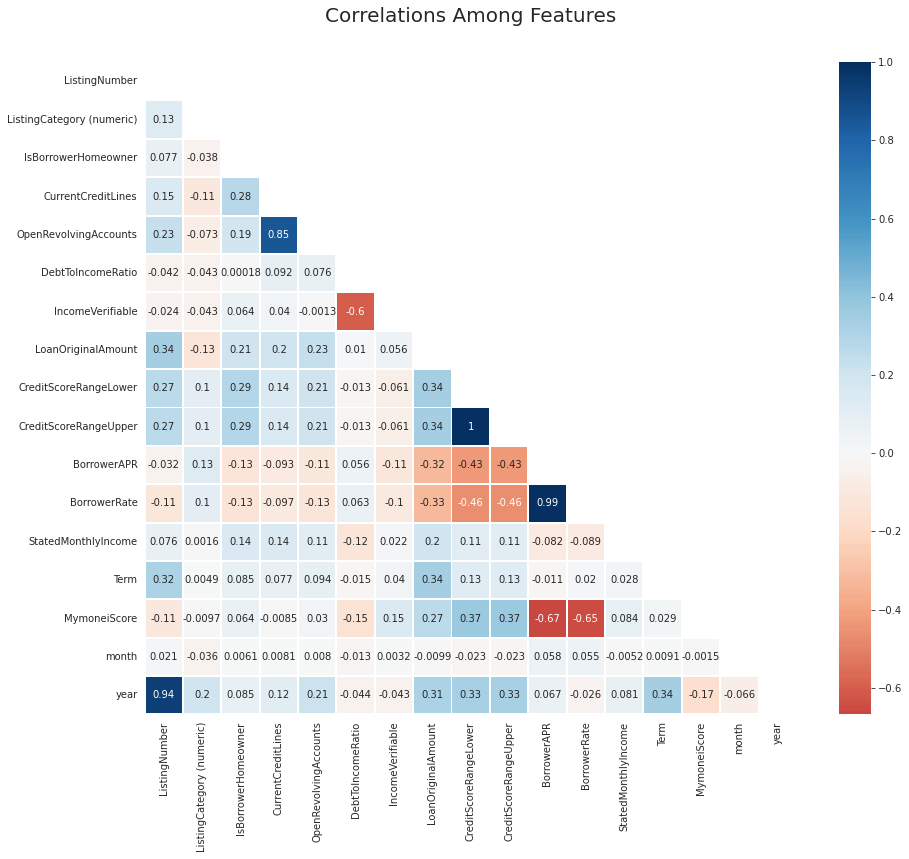

In [53]:
## heatmeap to see the correlation between features. 
# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(data.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize = (15,12))
sns.heatmap(data.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu', ## in order to reverse the bar replace "RdBu" with "RdBu_r"
            linewidths=.9, 
            linecolor='white',
            fmt='.2g',
            center = 0,
            square=True);
plt.title("Correlations Among Features", y = 1.03,fontsize = 20, pad = 40);

In [54]:
def boxgrid(x,y,**kwargs):
  sns.boxplot(x,y)
  plt.xticks(rotation=90);

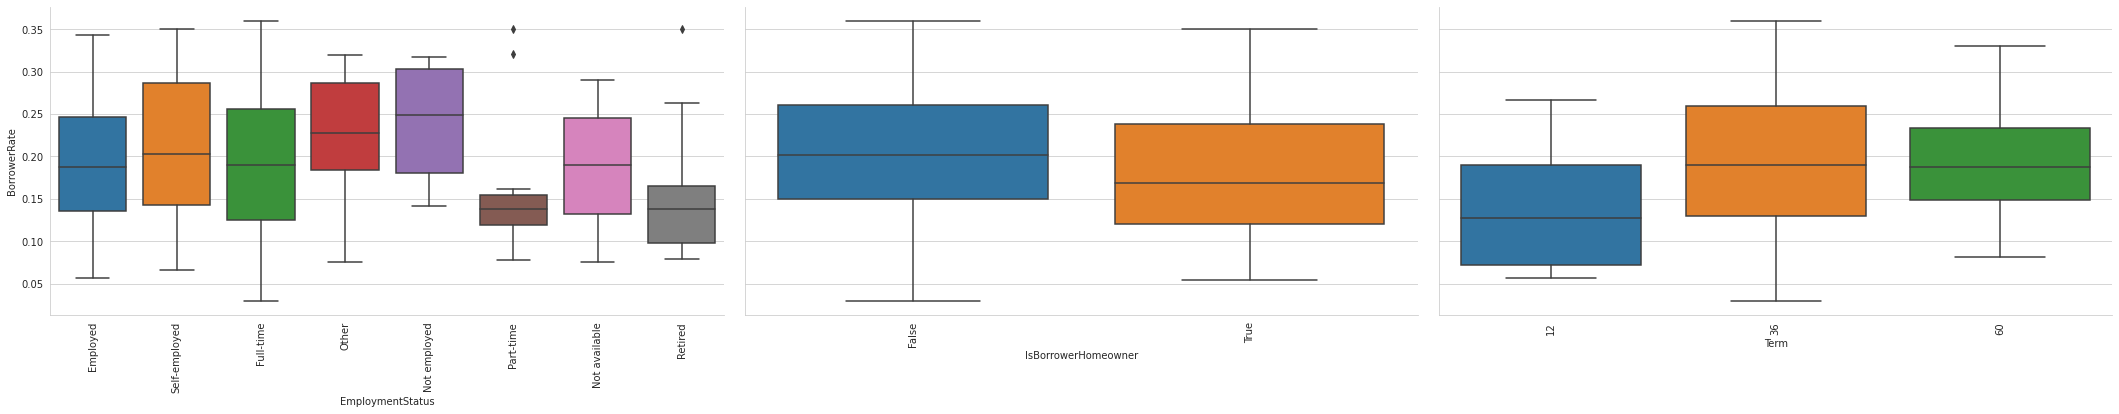

In [57]:
df_sample = data.sample(2000,replace=False)
g = sns.PairGrid(data=df_sample,y_vars=['BorrowerRate'],x_vars=['EmploymentStatus','IsBorrowerHomeowner','Term'],
                 height = 5, aspect=2);
g.map(boxgrid);

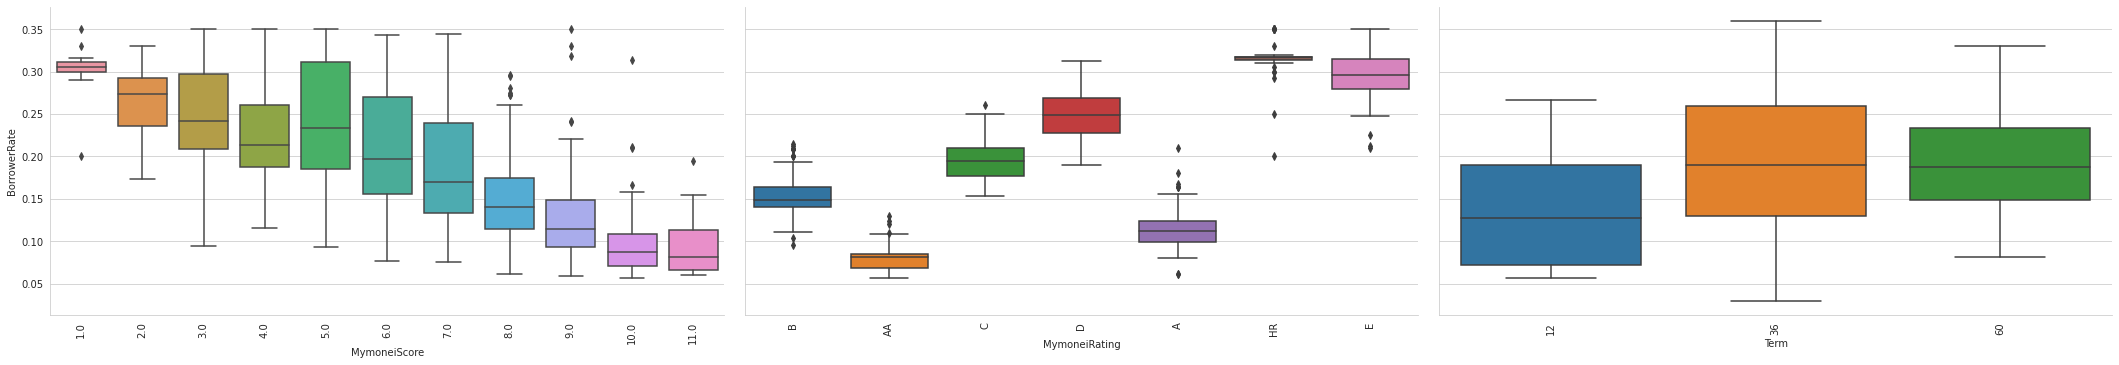

In [60]:
#interest rate vs moneiscore vs rating vs term
g = sns.PairGrid(data=df_sample,y_vars=['BorrowerRate'],x_vars=['MymoneiScore','MymoneiRating','Term'],
                 height = 5, aspect=2);
g.map(boxgrid);